#*Taller 2*
###Laura Hernandez
###Daniel Bernal
###Cristina Vidales

In [209]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as seaborn

In [210]:
df = pd.read_csv ('archivo.csv')

# Analisis exploratorio de datos

In [211]:
df.head(n=10) #10 primeros datos de la tabla

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,Australia,1,31.0,Female,Diploma,"$60,001 - $70,000",65000.5,2,Yes,0.0,Less,1
1,UK,0,22.0,Female,Degree,"Less than $20,000",10000.0,6,No,0.0,More,0
2,USA,0,46.0,Female,Degree,"More than $70,000",85000.5,7,No,0.0,More,0
3,France,0,37.0,Female,Diploma,"$20,001 - $30,000",25000.5,4,Yes,0.0,More,1
4,UK,0,66.0,Female,Degree,NaN,NaN,6,No,0.0,More,0
5,Australia,0,65.0,Male,Post-graduate degree,"$40,001 - $50,000",45000.5,3,Yes,1.0,Same,1
6,Australia,0,49.0,Male,Post-graduate degree,"$20,001 - $30,000",25000.5,2,No,2.0,Less,1
7,UK,0,38.0,Female,Post-graduate degree,"More than $70,000",85000.5,0,Yes,0.0,More,0
8,Australia,0,54.0,Male,Completed year 12,"More than $70,000",85000.5,6,Yes,5.0,Same,1
9,Australia,0,59.0,Female,Completed year 10,"Less than $20,000",10000.0,4,No,0.0,More,0


Conclusión: En los primeros 10 datos de la tabla, solamente un individuo vio ballenas, la mayoría de los individuos son mujeres, el 50% de los individuos en estos primeros 10 datos tienen disposición a pagar 2 dólares cada semana durante 10 años para conservar el espacio para avistar ballenas.

In [212]:
df.tail(n=10) #10 ultimos datos de la tabla

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
691,Italy,0,58.0,Female,Diploma,NaN,NaN,8,Yes,0.0,Less,1
692,Australia,0,53.0,Female,Post-graduate degree,"More than $70,000",85000.5,4,Yes,0.0,Less,1
693,Australia,0,34.0,Female,Completed year 10,"$50,001 - $60,000",55000.5,4,Yes,5.0,Less,1
694,The Netherlands,0,31.0,Female,Degree,"$50,001 - $60,000",55000.5,4,No,0.0,More,1
695,Australia,0,40.0,Female,Completed year 12,"$50,001 - $60,000",55000.5,15,No,10.0,Same,1
696,Australia,0,56.0,Female,Completed year 10,"Less than $20,000",10000.0,0,Yes,1.0,Same,1
697,Australia,0,38.0,Female,Completed year 10,"$30,001 - $40,000",35000.5,6,Yes,2.0,Same,1
698,Australia,0,24.0,Female,Diploma,"$20,001 - $30,000",25000.5,6,No,2.0,Less,1
699,Australia,0,50.0,Male,Post-graduate degree,"$30,001 - $40,000",35000.5,2,Yes,5.0,Same,1
700,Australia,0,32.0,Male,Degree,"More than $70,000",85000.5,8,Yes,0.0,Same,0


Conclusión: Ningunos de los últimos 10 individuos ha visto ballenas, la mayoría de la población es de Australia, el 80% son mujeres y el 90% de los últimos 10 individuos tienen disposición a pagar 2 dólares cada semana durante 10 años para conservar el espacio para avistar ballenas.

In [213]:
print("Número de filas:", len(df)) #Numero de filas

Número de filas: 701


In [214]:
print("Número de columnas:", len(df.columns)) #Numero de columnas

Número de columnas: 12


In [215]:
df.isna().sum() #Datos faltantes

Country         0
SeeWhales       0
Age            10
Gender          0
Education       0
Income_AUD     27
Income         27
AdultWhales     0
YoungWhales     0
Max_wtp         0
wtp             0
PayConserve     0
dtype: int64

In [216]:
df = df.dropna() #Se eliminaron los datos faltantes

In [217]:
df.isna().sum()

Country        0
SeeWhales      0
Age            0
Gender         0
Education      0
Income_AUD     0
Income         0
AdultWhales    0
YoungWhales    0
Max_wtp        0
wtp            0
PayConserve    0
dtype: int64

In [218]:
df.info() #Tipo de datos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 700
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      668 non-null    object 
 1   SeeWhales    668 non-null    int64  
 2   Age          668 non-null    float64
 3   Gender       668 non-null    object 
 4   Education    668 non-null    object 
 5   Income_AUD   668 non-null    object 
 6   Income       668 non-null    float64
 7   AdultWhales  668 non-null    int64  
 8   YoungWhales  668 non-null    object 
 9   Max_wtp      668 non-null    float64
 10  wtp          668 non-null    object 
 11  PayConserve  668 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 67.8+ KB


Conclusión: Seis variables son de tipo categórico, cinco son numéricas y ninguna de estas variables tienen datos nulos.

In [219]:
df.describe() #Descripcion general de los datos

,SeeWhales,Age,Income,AdultWhales,Max_wtp,PayConserve
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.128743,42.811377,44558.782186,6.055389,3.291916,0.669162
std,0.335166,15.422497,26282.669068,3.753050,18.472070,0.470868
min,0.000000,13.000000,10000.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,25000.500000,4.000000,0.000000,0.000000
50%,0.000000,41.000000,35000.500000,6.000000,0.000000,1.000000
75%,0.000000,54.000000,65000.500000,8.000000,2.000000,1.000000
max,1.000000,82.000000,85000.500000,30.000000,250.000000,1.000000


# Verificación de datos duplicados

In [220]:
df.duplicated().sum() #datos duplicados

0

In [221]:
df = df.drop_duplicates() 

In [222]:
df.duplicated().sum() 

0

In [223]:
df = df.replace({'Gender':{'Male':1,'Female':0}})
df = df.replace({'YoungWhales':{'Yes':1,'No':0}})

In [224]:
df

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,Australia,1,31.0,0,Diploma,"$60,001 - $70,000",65000.5,2,1,0.0,Less,1
1,UK,0,22.0,0,Degree,"Less than $20,000",10000.0,6,0,0.0,More,0
2,USA,0,46.0,0,Degree,"More than $70,000",85000.5,7,0,0.0,More,0
3,France,0,37.0,0,Diploma,"$20,001 - $30,000",25000.5,4,1,0.0,More,1
5,Australia,0,65.0,1,Post-graduate degree,"$40,001 - $50,000",45000.5,3,1,1.0,Same,1
...,...,...,...,...,...,...,...,...,...,...,...,...
696,Australia,0,56.0,0,Completed year 10,"Less than $20,000",10000.0,0,1,1.0,Same,1
697,Australia,0,38.0,0,Completed year 10,"$30,001 - $40,000",35000.5,6,1,2.0,Same,1
698,Australia,0,24.0,0,Diploma,"$20,001 - $30,000",25000.5,6,0,2.0,Less,1
699,Australia,0,50.0,1,Post-graduate degree,"$30,001 - $40,000",35000.5,2,1,5.0,Same,1


In [225]:
df.isnull()

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
696,False,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,False,False
699,False,False,False,False,False,False,False,False,False,False,False,False


# Visualización de datos

## Datos univariados

(array([ 20., 114.,  82., 106.,  88.,  94.,  73.,  51.,  29.,  11.]),
 array([13. , 19.9, 26.8, 33.7, 40.6, 47.5, 54.4, 61.3, 68.2, 75.1, 82. ]),
 <a list of 10 Patch objects>)

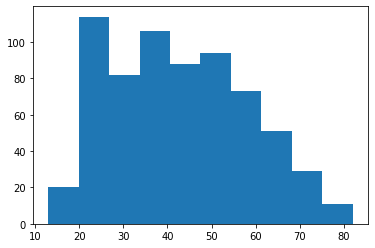

In [226]:
plt.hist(df["Age"])

Conclusión: La mayoría de inviduos tienen entre 20 y 50 años.

(array([135.,   0.,  87., 116.,  62.,   0.,  79.,  51.,   0., 138.]),
 array([10000.  , 17500.05, 25000.1 , 32500.15, 40000.2 , 47500.25,
        55000.3 , 62500.35, 70000.4 , 77500.45, 85000.5 ]),
 <a list of 10 Patch objects>)

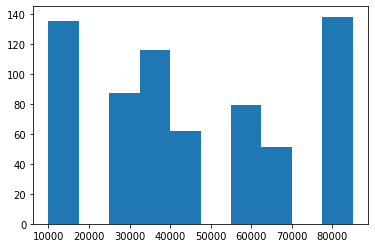

In [227]:
plt.hist(df["Income"])

Conclusión: La cantidad de ingresos que poseen la mayoría de individuos es 10.000 y 80.000 aproximadamente.

(array([ 98., 213., 236.,  73.,  23.,  13.,  11.,   0.,   0.,   1.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

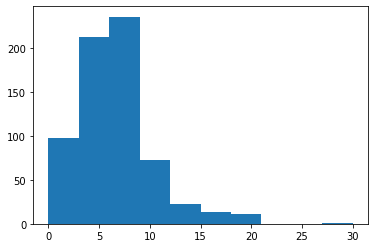

In [228]:
plt.hist(df["AdultWhales"])

Conclusión: La mayoría de los individuos han visto una cantidad de ballenas adultas entre 0 y 8 aproximadamente.

(array([658.,   2.,   1.,   1.,   3.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250.]),
 <a list of 10 Patch objects>)

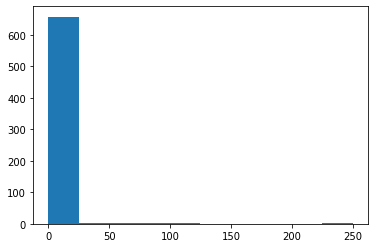

In [229]:
plt.hist(df["Max_wtp"])

Conclusión: La máxima disposición a pagar entre la mayoría de los individuos es de 25 aproximadamente y el valor máximo es de 250.

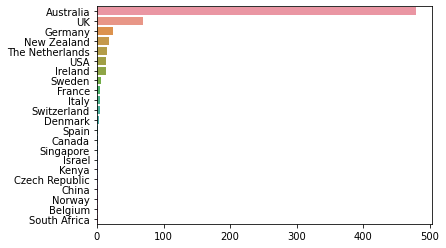

In [230]:
import seaborn as sns
Country = df['Country'].value_counts()
sns.barplot(x=Country.values, y=Country.index)
plt.show()

Conclusión:En la mayoría de los individuos su país de origen es Australia.

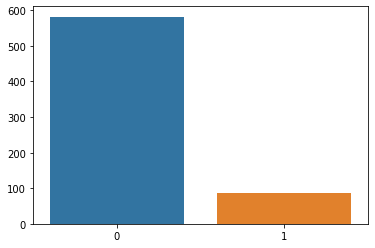

In [231]:
SeeWhales = df['SeeWhales'].value_counts()
sns.barplot(x=SeeWhales.index, y=SeeWhales.values)
plt.show()

Conclusión: Menos de 100 individuos vieron ballenas.

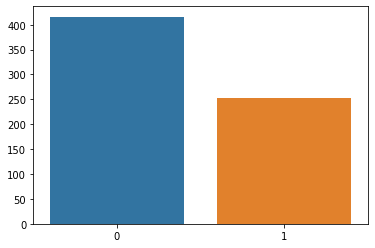

In [232]:
Gender = df['Gender'].value_counts()
sns.barplot(x=Gender.index, y=Gender.values)
plt.show()

Conclusión:La mayoría de los inviduos participantes son mujeres.

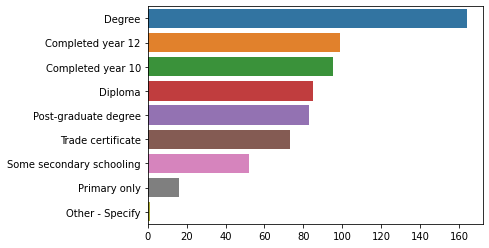

In [233]:
Education = df['Education'].value_counts()
sns.barplot(x=Education.values, y=Education.index)
plt.show()

Conclusión:Más de 160 individuos tienen un nivel educativo de carrera universitaria.

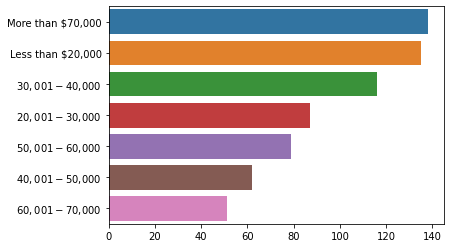

In [234]:
Income_AUD = df['Income_AUD'].value_counts()
sns.barplot(x=Income_AUD.values, y=Income_AUD.index)
plt.show()

Conclusión:Aproximadamente 140 individuos tienen un ingreso categórico de más de 70.000.

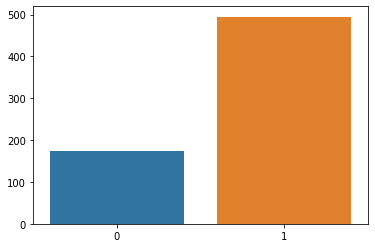

In [235]:
YoungWhales = df['YoungWhales'].value_counts()
sns.barplot(x=YoungWhales.index, y=YoungWhales.values)
plt.show()

Conclusión: La mayoría de personas vio ballenas jóvenes.

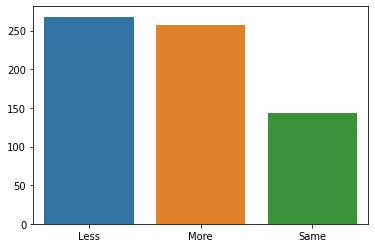

In [236]:
wtp = df['wtp'].value_counts()
sns.barplot(x=wtp.index, y=wtp.values)
plt.show()

Conclusión: La mayoría de los individuos tienen una disposición a pagar menor que lo propuesto para la conservación de las ballenas.

## Visualización bivariada

In [237]:
z = df.pivot_table(index='Country',aggfunc='count', columns='PayConserve')['wtp'].stack().reset_index()

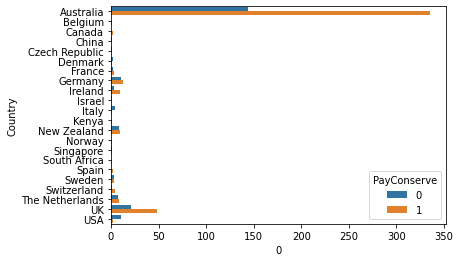

In [238]:
sns.barplot(data=z, y='Country', x=0, hue='PayConserve')

Conclusión:En la mayoría de los paises la disposición a pagar 2 dolares cada semana es positiva exceptuando a USA e Irlanda en el cual la disposición fue mayormente negativa.

In [239]:
c = pd.crosstab(df['SeeWhales'],df['PayConserve']).stack().reset_index()

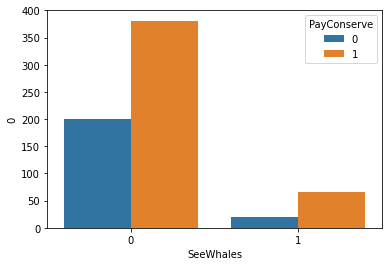

In [240]:
sns.barplot(data=c, x='SeeWhales', y=0, hue='PayConserve')

Conclusión: Aunque la mayoría de la población no ha visto ballenas, en esta se puede apreciar una disposición a pagar positiva.

In [241]:
m = pd.crosstab(df['Gender'],df['PayConserve']).stack().reset_index()

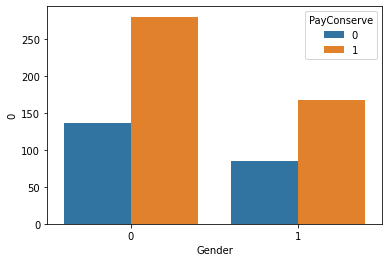

In [242]:
sns.barplot(data=m, x='Gender', y=0, hue='PayConserve')

Conclusión:Se vio mayor disposición a pagar en el género femenino a comparación que el género masculino.

In [243]:
e = pd.crosstab(df['Education'],df['PayConserve']).stack().reset_index()

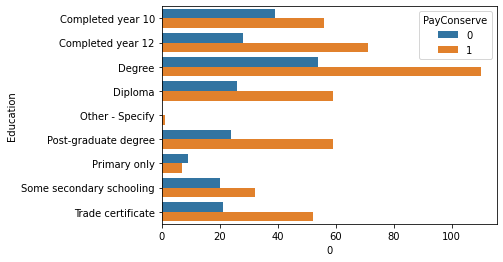

In [244]:
sns.barplot(data=e, y='Education', x=0, hue='PayConserve')

Conclusión: Entre mayor nivel de estudio se tenia entre los individuos era mayor la disposición a pagar.

In [245]:
i = pd.crosstab(df['Income_AUD'],df['PayConserve']).stack().reset_index()

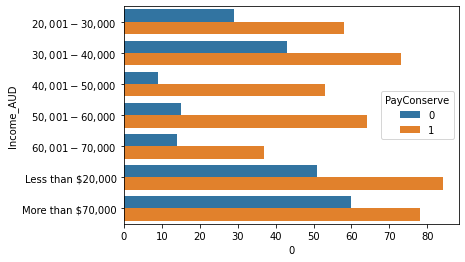

In [246]:
sns.barplot(data=i, y='Income_AUD', x=0, hue='PayConserve')

Conclusión: Los que tienen un ingreso categorizado de 20.000 o menor tienen mayor disposición a pagar.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


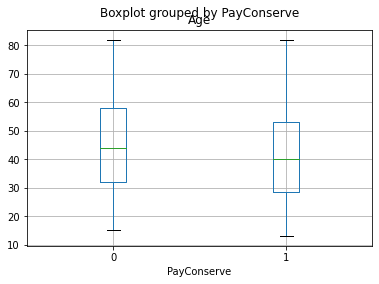

In [247]:
df.boxplot(column='Age',by='PayConserve')

Conclusión: La mediana de los que estan dispuestos a pagar es de 40 años en los individuos y los que no estan dispuestos a pagar es de aproximadamente 43 años.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


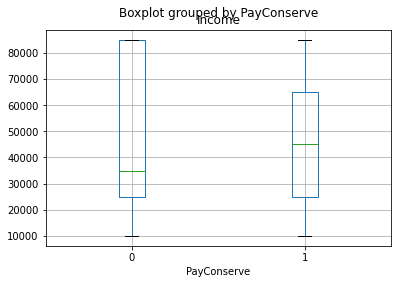

In [248]:
df.boxplot(column='Income',by='PayConserve')

Conclusión: La mediana de el ingreso en dólares australianos en los que no estan dispuestos a pagar es de aproximadamente 35.000 y de los que estan dispuestos a pagar es aproximadamente de 45.000.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


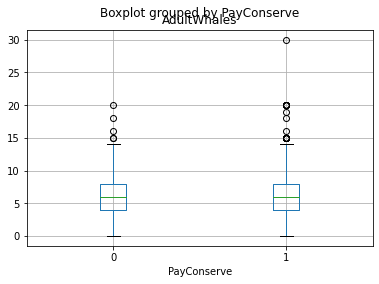

In [249]:
df.boxplot(column='AdultWhales',by='PayConserve')

Conclusión: La mediana del número de ballenas adultas vistas es igual en los que tienen disposición a pagar y lo que no la tienen.

In [250]:
l = pd.crosstab(df['YoungWhales'],df['PayConserve']).stack().reset_index()

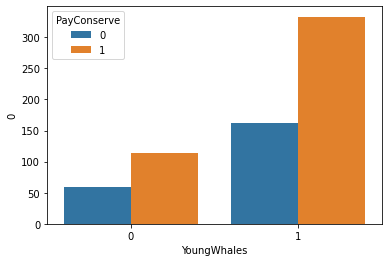

In [251]:
sns.barplot(data=l, x='YoungWhales', y=0, hue='PayConserve')

Conclusión: La mayoría de las personas que vieron ballenas jóvenes estan dispuestos a pagar por la conservación del espacio de avistamiento.

In [252]:
n = pd.crosstab(df['Max_wtp'],df['PayConserve']).stack().reset_index()

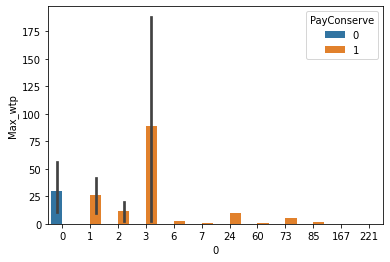

In [253]:
sns.barplot(data=n, y='Max_wtp', x=0, hue='PayConserve')

Conclusión: Entre 3 a 5 individuos aproximadamente estan dispuestos a pagar entre 75 y 100 para la conservación de los espacios de avistamientos.

In [254]:
t = pd.crosstab(df['wtp'],df['PayConserve']).stack().reset_index()

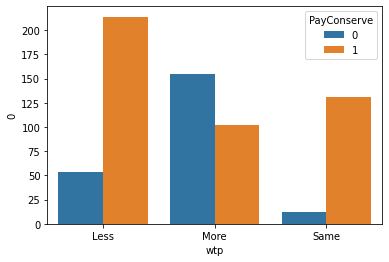

In [255]:
sns.barplot(data=t, x='wtp', y=0, hue='PayConserve')

Conclusión: La mayoría de los individuos que estan dispuestos a pagar, estan dispuestos a pagar menos de los dos dólares semanales por 10 años.

In [256]:
df

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,Australia,1,31.0,0,Diploma,"$60,001 - $70,000",65000.5,2,1,0.0,Less,1
1,UK,0,22.0,0,Degree,"Less than $20,000",10000.0,6,0,0.0,More,0
2,USA,0,46.0,0,Degree,"More than $70,000",85000.5,7,0,0.0,More,0
3,France,0,37.0,0,Diploma,"$20,001 - $30,000",25000.5,4,1,0.0,More,1
5,Australia,0,65.0,1,Post-graduate degree,"$40,001 - $50,000",45000.5,3,1,1.0,Same,1
...,...,...,...,...,...,...,...,...,...,...,...,...
696,Australia,0,56.0,0,Completed year 10,"Less than $20,000",10000.0,0,1,1.0,Same,1
697,Australia,0,38.0,0,Completed year 10,"$30,001 - $40,000",35000.5,6,1,2.0,Same,1
698,Australia,0,24.0,0,Diploma,"$20,001 - $30,000",25000.5,6,0,2.0,Less,1
699,Australia,0,50.0,1,Post-graduate degree,"$30,001 - $40,000",35000.5,2,1,5.0,Same,1


In [257]:
df=df.drop(columns=['Country','SeeWhales','Education','Income_AUD','wtp'], axis=1)

In [258]:
df

,Age,Gender,Income,AdultWhales,YoungWhales,Max_wtp,PayConserve
0,31.0,0,65000.5,2,1,0.0,1
1,22.0,0,10000.0,6,0,0.0,0
2,46.0,0,85000.5,7,0,0.0,0
3,37.0,0,25000.5,4,1,0.0,1
5,65.0,1,45000.5,3,1,1.0,1
...,...,...,...,...,...,...,...
696,56.0,0,10000.0,0,1,1.0,1
697,38.0,0,35000.5,6,1,2.0,1
698,24.0,0,25000.5,6,0,2.0,1
699,50.0,1,35000.5,2,1,5.0,1


# Análisis de correlación

In [259]:
df.corr()

,Age,Gender,Income,AdultWhales,YoungWhales,Max_wtp,PayConserve
Age,1.000000,0.105724,-0.099886,0.090113,0.031347,-0.051015,-0.101716
Gender,0.105724,1.000000,0.103052,0.070860,0.058259,0.019567,-0.010691
Income,-0.099886,0.103052,1.000000,0.059070,0.117574,0.051494,-0.016063
AdultWhales,0.090113,0.070860,0.059070,1.000000,-0.005848,0.243281,0.040078
YoungWhales,0.031347,0.058259,0.117574,-0.005848,1.000000,0.047691,0.012819
Max_wtp,-0.051015,0.019567,0.051494,0.243281,0.047691,1.000000,0.125401
PayConserve,-0.101716,-0.010691,-0.016063,0.040078,0.012819,0.125401,1.000000


Conclusión: La edad, el género y el ingreso en dólares australianes tienen una correlación negativa con la disposición a pagar 2 dolares semanales por 10 años patra la conservación de los espacios de avistamientos de ballenas.


Mientras que el mayor de ballenas adultas vistas, el avistamiento de ballenas jovenes y la máxima disposición a pagar poseen una correlación positiva.

In [260]:
df.corr(method="spearman")

,Age,Gender,Income,AdultWhales,YoungWhales,Max_wtp,PayConserve
Age,1.000000,0.108226,-0.057471,0.064349,0.040857,-0.191821,-0.097485
Gender,0.108226,1.000000,0.104436,0.039980,0.058259,-0.001200,-0.010691
Income,-0.057471,0.104436,1.000000,0.058659,0.121695,0.106140,0.003990
AdultWhales,0.064349,0.039980,0.058659,1.000000,-0.012534,0.040770,0.015463
YoungWhales,0.040857,0.058259,0.121695,-0.012534,1.000000,0.047573,0.012819
Max_wtp,-0.191821,-0.001200,0.106140,0.040770,0.047573,1.000000,0.570777
PayConserve,-0.097485,-0.010691,0.003990,0.015463,0.012819,0.570777,1.000000


Conclusión: Del cambio de método de Pearson a Spearman, se puede observar que los ingresos en dólares australianos pasan de tener una correlación negativa a una positiva.

Mientras que las demás variables no se ven alteradas en el sentido de su correlación.

# Modelamiento

In [261]:
y=df['PayConserve']
X= sm.add_constant(df[['Max_wtp','Income','AdultWhales','YoungWhales','Gender','Age']])
model= sm.OLS(y,X)
reg=model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PayConserve   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.006
Date:                Sat, 29 Oct 2022   Prob (F-statistic):            0.00663
Time:                        04:55:16   Log-Likelihood:                -435.24
No. Observations:                 668   AIC:                             884.5
Df Residuals:                     661   BIC:                             916.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7914      0.073     10.900      0.000       0.649       0.934
Max_wtp         0.0029      0.001      2.910      0.004       0.001       0.005
Income      -6.306e-07   7.02e-07     -0.898      0.369   -2.01e-06    7.48e-07
AdultWhales     0.0029      0.005      0.585      0.559      -0.007       0.013
YoungWhales     0.0159      0.042      0.383      0.702      -0.066       0.098
Gender         -0.0011      0.038     -0.028      0.978      -0.075       0.073
Age            -0.0031      0.001     -2.601      0.010      -0.005      -0.001
==============================================================================
Omnibus:                     5965.940   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.245
Skew:                          -0.682   Prob(JB):                     4.23e-25
Kurtosis:                       1.525   Cond. No.                     2.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Conclusión: 

Las variables que no son significativas en este modelo económico son el ingreso y la máxima disposición a pagar.

Mientras que las otras variables (Número de ballenas adultas vistas, el avistamiento de ballenas jóvenes, el género del individuo y la edad) son significativas ya que tienen un P-Valor mayor a 0.05.

¿Cuál es el efecto de haber visto ballenas (adultas o jóvenes) en la probabilidad de pagar por conservar 2 dólares cada semana durante 10 años?


R//En proporción, el porcentaje de personas que han visto ballenas y están dispuestos a pagar por la conservación del espacio es mayor al porcentaje de personas que no han visto ballenas y están dispuestas a pagar. 
Por ende, el haber visto ballenas tiene un efecto positivo en los individuos para pagar de 2 dólares semanales para la conservación del espacio.

Al haber visto ballenas jovenes tiene más efecto en la disposición a pagar 2 dólares cada semana durante 10 años por la conservación de lugares de avistamiento de ballenas en comparación con el número de ballenas adultas vistas.

